## Introduction

This jupyter notebook focuses on reading and cleaning data for intital exploratory data analysis. The dataset that is used in this analysis is Austin Weather Data from 2011 and a dataset by National Oceanic and Atmospheric Administration(NOAA) from 1981-2010 as Austin Historical Data which is a part of case study for an online Data Scientist Degree course at DataCamp.  


__Importing the necessary python libraries__

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

Reading the data file using pandas read_csv() function in a pandas dataframe

In df we read climate data from NOAA from 1981 to 2010 hourly dataset average over 30 years and in df_climate we read 2011 austin weather data from 2011

In [47]:
df = pd.read_csv('NOAA_QCLCD_2011_hourly_13904.csv')
df_climate = pd.read_csv('weather_data_austin_2010.csv')

__Checking our data using the head() function of pandas dataframe__

In [48]:
df.head()

,13904,20110101,0053,12,OVC045,,10.00,.1,.2,.3,...,.18,.19,29.95,.20,AA,.21,.22,.23,29.95.1,.24
0,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
1,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
2,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
3,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,
4,13904,20110101,553,12,BKN065,,10.00,,,,...,015,,30.06,,AA,,,,30.06,


> As we can see in the above rows that our dataset has no headers and our header is the first data row from the dataset. There is also no index column and there is no datetime column that can be used as index column. So, we need to read the data without the header. This can be done by using header=None while reading a file using read_csv function. 

In [50]:
df = pd.read_csv('NOAA_QCLCD_2011_hourly_13904.csv', header=None)

In [51]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,13904,20110101,53,12,OVC045,,10.00,,,,...,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,


> We can see that we have column labels but it is not informative. 

__This is the string that contains column names that we can use as column names for our dataset.__

In [52]:
s = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'

__We can split the string into different column names and create a list of column names__

In [53]:
column_labels_list = s.split(',')
column_labels_list

['Wban',
 'date',
 'Time',
 'StationType',
 'sky_condition',
 'sky_conditionFlag',
 'visibility',
 'visibilityFlag',
 'wx_and_obst_to_vision',
 'wx_and_obst_to_visionFlag',
 'dry_bulb_faren',
 'dry_bulb_farenFlag',
 'dry_bulb_cel',
 'dry_bulb_celFlag',
 'wet_bulb_faren',
 'wet_bulb_farenFlag',
 'wet_bulb_cel',
 'wet_bulb_celFlag',
 'dew_point_faren',
 'dew_point_farenFlag',
 'dew_point_cel',
 'dew_point_celFlag',
 'relative_humidity',
 'relative_humidityFlag',
 'wind_speed',
 'wind_speedFlag',
 'wind_direction',
 'wind_directionFlag',
 'value_for_wind_character',
 'value_for_wind_characterFlag',
 'station_pressure',
 'station_pressureFlag',
 'pressure_tendency',
 'pressure_tendencyFlag',
 'presschange',
 'presschangeFlag',
 'sea_level_pressure',
 'sea_level_pressureFlag',
 'record_type',
 'hourly_precip',
 'hourly_precipFlag',
 'altimeter',
 'altimeterFlag',
 'junk']

__We set the column labels list as our column names for our dataset__

In [54]:
df.columns = column_labels_list

In [55]:
# Checking the new dataframe
df.head()

,Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,...,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk
0,13904,20110101,53,12,OVC045,,10.00,,,,...,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,


__We have a list of columns which we would like to drop from our dataset.__

In [56]:
columns_to_drop = ['sky_conditionFlag','visibilityFlag', 'wx_and_obst_to_vision', 'wx_and_obst_to_visionFlag', 'dry_bulb_farenFlag',
                   'dry_bulb_celFlag', 'wet_bulb_farenFlag', 'wet_bulb_celFlag', 'dew_point_farenFlag', 'dew_point_celFlag', 'relative_humidityFlag', 
                   'wind_speedFlag', 'wind_directionFlag', 'value_for_wind_character', 'value_for_wind_characterFlag', 'station_pressureFlag',
                   'pressure_tendencyFlag', 'pressure_tendency', 'presschange', 'presschangeFlag', 'sea_level_pressureFlag', 'hourly_precip', 'hourly_precipFlag',
                   'altimeter', 'record_type', 'altimeterFlag', 'junk']

In [57]:
# We drop the columns using drop() function of pandas dataframe
new_df = df.drop(columns_to_drop, axis='columns')

In [58]:
new_df.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
0,13904,20110101,53,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15,360,29.42,29.95
1,13904,20110101,153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2,13904,20110101,253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
3,13904,20110101,353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
4,13904,20110101,453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04


__We are now going to construct datetime index by cleaning and transforming date & time columns in our dataset__ 

In [59]:
# Convert the date column to string: df_dropped['date']
new_df['date'] = new_df['date'].astype(str)

# Pad leading zeros to the Time column: df_dropped['Time']
new_df['Time'] = new_df['Time'].apply(lambda x:'{:0>4}'.format(x))

# Concatenate the new date and Time columns: date_string
date_string = new_df['date'] + new_df['Time']

# Convert the date_string Series to datetime: date_times
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')

# Set the index to be the new date_times container: df_clean
new_df = new_df.set_index(date_times)

# Print the output of df_clean.head()
print(new_df.head())

                      Wban      date  Time  StationType sky_condition  \
2011-01-01 00:53:00  13904  20110101  0053           12        OVC045   
2011-01-01 01:53:00  13904  20110101  0153           12        OVC049   
2011-01-01 02:53:00  13904  20110101  0253           12        OVC060   
2011-01-01 03:53:00  13904  20110101  0353           12        OVC065   
2011-01-01 04:53:00  13904  20110101  0453           12        BKN070   

                    visibility dry_bulb_faren dry_bulb_cel wet_bulb_faren  \
2011-01-01 00:53:00      10.00             51         10.6             38   
2011-01-01 01:53:00      10.00             51         10.6             37   
2011-01-01 02:53:00      10.00             51         10.6             37   
2011-01-01 03:53:00      10.00             50         10.0             38   
2011-01-01 04:53:00      10.00             50         10.0             37   

                    wet_bulb_cel dew_point_faren dew_point_cel  \
2011-01-01 00:53:00          3.1

In [60]:
# Print the dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(new_df.loc['08:00:00 2011-06-20':'09:00:00 2011-06-20',['dry_bulb_faren', 'wind_speed', 'dew_point_faren']])

                    dry_bulb_faren wind_speed dew_point_faren
2011-06-20 08:27:00              M          M               M
2011-06-20 08:28:00              M          M               M
2011-06-20 08:29:00              M          M               M
2011-06-20 08:30:00              M          M               M
2011-06-20 08:31:00              M          M               M
2011-06-20 08:32:00              M          M               M
2011-06-20 08:33:00              M          M               M
2011-06-20 08:34:00              M          M               M
2011-06-20 08:35:00              M          M               M
2011-06-20 08:53:00             83         23              71


> We can see that the missing values in our dataset are labeled as 'M'. We are going to transform these columns such that these contains only numeric values and we will interpret missing values as NaN.

In [61]:
# Convert the dry_bulb_faren column to numeric values: df_clean['dry_bulb_faren']
new_df['dry_bulb_faren'] = pd.to_numeric(new_df['dry_bulb_faren'], errors='coerce')

# Convert the wind_speed column to numeric values
new_df['wind_speed'] = pd.to_numeric(new_df['wind_speed'], errors='coerce')

# Convert the dew_point_faren column to numeric values
new_df['dew_point_faren'] = pd.to_numeric(new_df['dew_point_faren'], errors='coerce')

# Print the transformed dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(new_df.loc['08:00:00 2011-06-20':'09:00:00 2011-06-20', ['dry_bulb_faren', 'wind_speed', 'dew_point_faren']])

                     dry_bulb_faren  wind_speed  dew_point_faren
2011-06-20 08:27:00             NaN         NaN              NaN
2011-06-20 08:28:00             NaN         NaN              NaN
2011-06-20 08:29:00             NaN         NaN              NaN
2011-06-20 08:30:00             NaN         NaN              NaN
2011-06-20 08:31:00             NaN         NaN              NaN
2011-06-20 08:32:00             NaN         NaN              NaN
2011-06-20 08:33:00             NaN         NaN              NaN
2011-06-20 08:34:00             NaN         NaN              NaN
2011-06-20 08:35:00             NaN         NaN              NaN
2011-06-20 08:53:00            83.0        23.0             71.0


__Here we are looking at the climate data by NOAA from 1984-2010__ 

In [62]:
df_climate.head()

,Temperature,DewPoint,Pressure,Date
0,46.2,37.5,1.0,20100101 00:00
1,44.6,37.1,1.0,20100101 01:00
2,44.1,36.9,1.0,20100101 02:00
3,43.8,36.9,1.0,20100101 03:00
4,43.5,36.8,1.0,20100101 04:00


__We check the column names for our df_climate dataset__

In [63]:
df_climate.columns

Index([u'Temperature', u'DewPoint', u'Pressure', u'Date'], dtype='object')

__We transform our dataset by constructing a datetime index by cleaning date and time columns__

In [64]:
# Convert the date column to string: df_climate['date']
df_climate['Date'] = df_climate['Date'].astype(str)

# Convert the date_string Series to datetime: date_times
date_times = pd.to_datetime(df_climate['Date'], format='%Y-%m-%d %H:%M')

# Set the index to be the new date_times container: df_climate
df_climate = df_climate.set_index(date_times)

# Dropping the Date column as it is no longer needed
df_climate = df_climate.drop(['Date'], axis='columns')

__We can see that our dataset is now indexed with date column__

In [65]:
df_climate.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


> We can see both of our datasets are now clean. This dataset has a datetime index and informative column names. We are now going to use these datasets (new_df and df_climate) for further analysis.  

**____**

### Statistical Exploratory Data Analysis

##### Now we are going to do statistical data analysis on our clean dataset. We start by using describe() function of pandas dataframes to get some initial statistical values like mean, std, min, max for all of the columns.  

In [66]:
new_df.describe()


,Wban,StationType,dry_bulb_faren,dew_point_faren,wind_speed
count,10337.0,10337.0,10326.00000,10323.000000,10318.000000
mean,13904.0,12.0,69.16841,54.757144,9.086451
std,0.0,0.0,17.85284,15.812253,5.913850
min,13904.0,12.0,18.00000,6.000000,0.000000
25%,13904.0,12.0,57.00000,43.000000,5.000000
50%,13904.0,12.0,72.00000,60.000000,9.000000
75%,13904.0,12.0,81.00000,68.000000,13.000000
max,13904.0,12.0,110.00000,76.000000,30.000000


In [67]:
df_climate.describe()

,Temperature,DewPoint,Pressure
count,8759.000000,8759.000000,8759.0
mean,68.077258,55.939057,1.0
std,13.773378,11.757706,0.0
min,41.800000,35.300000,1.0
25%,57.100000,44.400000,1.0
50%,68.700000,57.300000,1.0
75%,78.550000,67.800000,1.0
max,95.300000,72.900000,1.0


__We would now like to compare 2011 weather data with the 30-year normals reported in 2010 from the NOAA dataset. We would like to know on average, how much hotter was every day in 2011 than expected from the 30-year average?__

In [72]:
# We will first downsample df_clean by day and aggregate by mean into daily_mean_2011
daily_mean_2011 = new_df.resample('D').mean()

# We now have column values for every day 
daily_mean_2011.head()

,Wban,StationType,dry_bulb_faren,dew_point_faren,wind_speed
2011-01-01,13904,12,50.166667,20.500000,11.083333
2011-01-02,13904,12,39.416667,19.708333,4.166667
2011-01-03,13904,12,46.846154,35.500000,2.653846
2011-01-04,13904,12,53.367347,50.408163,2.510204
2011-01-05,13904,12,57.965517,40.068966,4.689655


In [76]:
# We now extract the dry_bulb_faren column from daily_mean_2011 using .values into daily_temp_2011
daily_temp_2011 = daily_mean_2011['dry_bulb_faren'].values
daily_temp_2011[:10]

array([ 50.16666667,  39.41666667,  46.84615385,  53.36734694,
        57.96551724,  46.95833333,  51.91666667,  51.81481481,
        43.61363636,  38.27777778])

In [79]:
# We again downsample df_climate by day and aggregate by mean: daily_climate
daily_climate = df_climate.resample('D').mean()
daily_climate.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01,49.337500,37.716667,1.0
2010-01-02,49.795833,38.370833,1.0
2010-01-03,49.900000,38.279167,1.0
2010-01-04,49.729167,38.008333,1.0
2010-01-05,49.841667,38.087500,1.0


> __We noticed that the indexes of df_clean and df_climate are not aligned - df_clean has dates in 2011, while df_climate has dates in 2010. Therefore, we need to extract the temperature column into a NumPy array__

In [81]:
# We extract the Temperature column from daily_climate using .reset_index(): daily_temp_climate
daily_temp_climate = daily_climate.reset_index()['Temperature']
daily_temp_climate[:10]

0    49.337500
1    49.795833
2    49.900000
3    49.729167
4    49.841667
5    49.679167
6    49.491667
7    49.366667
8    49.354167
9    49.354167
Name: Temperature, dtype: float64

In [82]:
# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_climate
print(difference.mean())

1.33018318701


> We can see that the difference between mean temperature between 2011 and 30 year average is 1.33 degree fahrenheit.

__We are now going to observe on average, how much hotter is it when the sun is shining? We will compare temperatures on sunny days against temperatures on overcast days. We are going to do this by finding difference between mean daily maximum and minimum temperatures for both clear and overcast days.__

In [89]:
# Select days that are sunny: sunny
sunny = new_df.loc[new_df['sky_condition'] == 'CLR']

# Select days that are overcast: overcast
overcast = new_df.loc[new_df['sky_condition'].str.contains('OVC')]

In [90]:
# Resample sunny and overcast, aggregating by maximum daily temperature
sunny_daily_max = sunny.resample('D').max()
overcast_daily_max = overcast.resample('D').max()

In [91]:
# Printing the difference between the mean of sunny_daily_max and overcast_daily_max
print("Printing difference between the mean of sunny_daily_max and overcast_daily_max \n")
print(sunny_daily_max.mean() - overcast_daily_max.mean())

Printing difference between the mean of sunny_daily_max and overcast_daily_max 

Wban               0.000000
StationType        0.000000
dry_bulb_faren     6.504304
dew_point_faren   -4.339286
wind_speed        -3.246062
dtype: float64


In [92]:
# Resample sunny and overcast, aggregating by minimum daily temperature
sunny_daily_min = sunny.resample('D').min()
overcast_daily_min = overcast.resample('D').min()

In [93]:
# Printing the difference between the mean of sunny_daily_min and overcast_daily_min
print("Printing difference between the mean of sunny_daily_min and overcast_daily_min \n")
print(sunny_daily_min.mean() - overcast_daily_min.mean())

Printing difference between the mean of sunny_daily_min and overcast_daily_min 

Wban               0.000000
StationType        0.000000
dry_bulb_faren    -1.901923
dew_point_faren   -4.191026
wind_speed        -1.796245
dtype: float64


___

### Visual Exploratory Data Analysis

__We are going to perform visual data analysis using datetime index in our dataframes. We will start with finding out whether there is a correlation between temperature and visibility__

                dry_bulb_faren
dry_bulb_faren             1.0


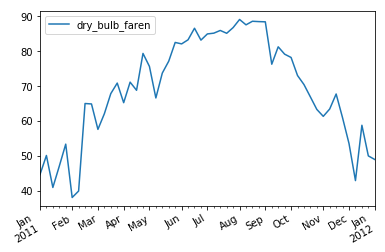

In [104]:
# Select the visibility and dry_bulb_faren columns and resample them: weekly_mean
weekly_mean = new_df[['visibility', 'dry_bulb_faren']].resample('W').mean()

# Print the output of weekly_mean.corr()
print(weekly_mean.corr())

# Plot weekly_mean with subplots=True
weekly_mean.plot(subplots=True)
plt.show()

__We are going to explore sunny days in greater detail. Specifically, we will use a box plot to visualize the fraction of days that are sunny by calculating by dividing the number of sunny hours by the number of total hours__

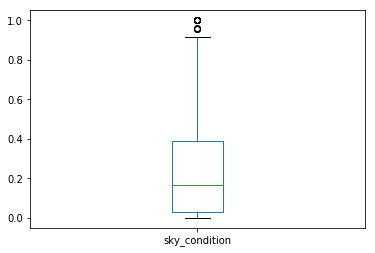

In [107]:
# Create a Boolean Series for sunny days: sunny
sunny = new_df['sky_condition'] == 'CLR'

# Resample the Boolean Series by day and compute the sum: sunny_hours
sunny_hours = sunny.resample('D').sum()

# Resample the Boolean Series by day and compute the count: total_hours
total_hours = sunny.resample('D').count()

# Divide sunny_hours by total_hours: sunny_fraction
sunny_fraction = sunny_hours / total_hours

# Make a box plot of sunny_fraction
sunny_fraction.plot(kind='box')
plt.show()

__Dew point is a measure of relative humidity based on pressure and temperature. A dew point above 65 is considered uncomfortable while a temperature above 90 is also considered uncomfortable. We will explore the maximum temperature and dew point of each month. The columns of interest are 'dew_point_faren' and 'dry_bulb_faren'.__

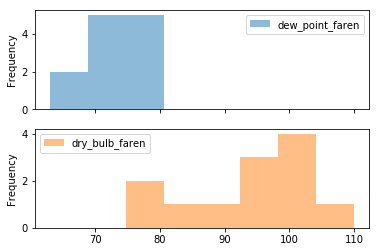

In [105]:
# Resample dew_point_faren and dry_bulb_faren by Month, aggregating the maximum values: monthly_max
monthly_max = new_df[['dew_point_faren', 'dry_bulb_faren']].resample('M').max()

# Generate a histogram with bins=8, alpha=0.5, subplots=True
monthly_max.plot(kind='hist', bins=8, alpha=0.5, subplots=True)

# Show the plot
plt.show()

> Uncomfortably, we notice that the maximum dew point is above 65 every month!

__We already know that 2011 was hotter than the climate normals for the previous thirty years. We will now compare the maximum temperature in August 2011 against that of the August 2010 climate normals. We will use a CDF plot to determine the probability of the 2011 daily maximum temperature in August being above the 2010 climate normal value.__ 

In [122]:
# Extract the maximum temperature in August 2010 from df_climate: august_max
august_max = df_climate.loc['2010-Aug','Temperature'].max()
print(august_max)

95.3


In [123]:
# Resample the August 2011 temperatures in df_clean by day and aggregate the maximum value: august_2011
august_2011 = new_df.loc['2011-Aug','dry_bulb_faren'].resample('D').max()
print(august_2011[:10])

2011-08-01    103.0
2011-08-02    103.0
2011-08-03    103.0
2011-08-04    104.0
2011-08-05    103.0
2011-08-06    102.0
2011-08-07    102.0
2011-08-08    103.0
2011-08-09    103.0
2011-08-10    102.0
Freq: D, Name: dry_bulb_faren, dtype: float64


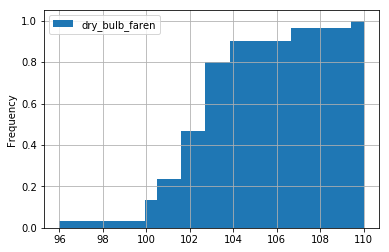

In [124]:
# Filter out days in august_2011 where the value exceeded august_max: august_2011_high
august_2011_high = august_2011.loc[august_2011 > august_max]

# Construct a CDF of august_2011_high
august_2011_high.plot(kind='hist', normed=True, cumulative=True, bins=25, legend='right', grid=True)

# Display the plot
plt.show()

> 50% probability of the 2011 daily maximum temperature in August being 5 degrees above the 2010 climate normal value.